In [1]:
import random
import functions
from sklearn import preprocessing

test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

# Random Forest

In [3]:
import numpy as np
x = np.array(train_matrix)
x = preprocessing.scale(x) # normalize
y = np.array(train_label)
x_test = np.array(test_matrix)
x_test = preprocessing.scale(x_test) # normalize

In [4]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

## parameter n_estimators

In [5]:
from sklearn.ensemble import RandomForestRegressor
import datetime

n_estimators = np.linspace(1, 100, 100)
error = []
time = []
for i in n_estimators:
    starttime = datetime.datetime.now()
    rfc = RandomForestRegressor(n_estimators = int(i))
    error.append(cross_val(x, y, rfc))
    endtime = datetime.datetime.now()
    time.append((endtime - starttime).microseconds)

min error: 0.3860616487534622
n_estimators when at min error: 95


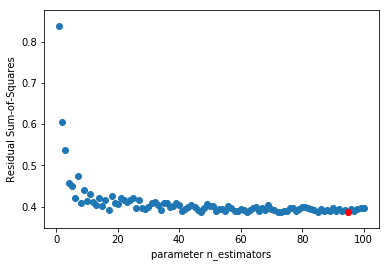

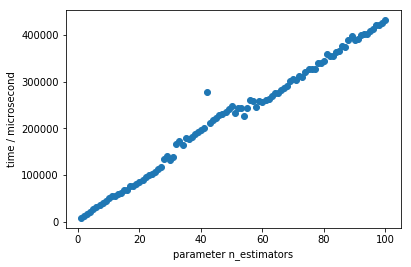

In [12]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('n_estimators when at min error:', error.index(min(error)) + 1)
plt.scatter(n_estimators, error)
plt.scatter(error.index(min(error)) + 1, min(error), c = 'r')
plt.xlabel('parameter n_estimators')
plt.ylabel('Residual Sum-of-Squares')
plt.show()

plt.scatter(n_estimators, time)
plt.xlabel('parameter n_estimators')
plt.ylabel('time / microsecond')
plt.show()

In [7]:
from sklearn.metrics import r2_score

rfc = RandomForestRegressor(n_estimators = error.index(min(error)) + 1)
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
for train_index, test_index in index:
    rfc.fit(x[train_index], y[train_index]) # train
    y_pred = rfc.predict(x[test_index]) # predict
    accuracy = r2_score(list(y_pred), list(y[test_index]))
print('Random forest accuracy', accuracy)
best_n_estimators = error.index(min(error)) + 1

Random forest accuracy 0.852610489550337


## parameter max_depth

In [8]:
def cross_val_score(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_train_score = []
    cross_val_test_score = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        cross_val_train_score.append(model.score(data[train_index], label[train_index]))
        cross_val_test_score.append(model.score(data[test_index], label[test_index]))
    train_score = sum(cross_val_train_score)/len(cross_val_train_score)
    test_score = sum(cross_val_test_score)/len(cross_val_test_score)
    return train_score, test_score

In [9]:
from sklearn.ensemble import RandomForestRegressor

max_depth = np.linspace(1, 20, 20)
train_score = []
test_score = []
for i in max_depth:
    rfc = RandomForestRegressor(n_estimators = best_n_estimators, max_depth = int(i))
    endtime = datetime.datetime.now()
    train_score.append(cross_val_score(x, y, rfc)[0])
    test_score.append(cross_val_score(x, y, rfc)[1])

max validation score: 0.7905805170806559
max_depth when at min error: 5


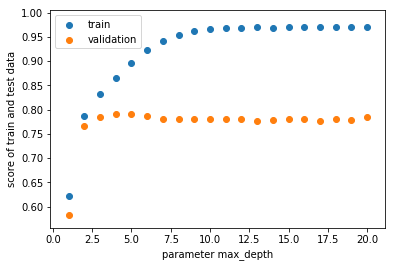

In [10]:
import matplotlib.pyplot as plt
import math
print('max validation score:', max(test_score))
print('max_depth when at min error:', test_score.index(max(test_score)) + 1)
plt.scatter(max_depth, train_score, label = "train")
plt.scatter(max_depth, test_score, label = "validation")
plt.legend()
plt.xlabel('parameter max_depth')
plt.ylabel('score of train and test data')
plt.show()
best_max_depth = test_score.index(max(test_score)) + 1;

In [11]:
from sklearn.metrics import r2_score

rfc = RandomForestRegressor(n_estimators = best_n_estimators, max_depth = best_max_depth)
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
for train_index, test_index in index:
    rfc.fit(x[train_index], y[train_index]) # train
    y_pred = rfc.predict(x[test_index]) # predict
    accuracy = r2_score(list(y_pred), list(y[test_index]))
print('Random forest accuracy', accuracy)

Random forest accuracy 0.8801730804196325
